# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a foundational technique in statistics and machine learning for reducing the dimensionality of datasets, extracting important features, and visualizing complex data. Developed by Karl Pearson in 1901, PCA is widely used in exploratory data analysis, preprocessing for predictive modeling, and uncovering hidden patterns in high-dimensional data.

---

## Table of Contents
1. [Introduction to PCA](#introduction)
2. [Mathematical Foundations of PCA](#math)
3. [Why Use PCA? Practical Motivations](#why)
4. [Data Preparation for PCA](#prep)
5. [PCA on Real-World Data](#realdata)
6. [Visualizing PCA Results](#visualization)
7. [Choosing the Number of Components](#ncomponents)
8. [Reconstruction and Information Loss](#reconstruction)
9. [PCA for Visualization: 2D and 3D Plots](#2d3d)
10. [Limitations, Pitfalls, and Best Practices](#limitations)

---

## 1. Introduction to PCA

PCA is an unsupervised linear transformation technique that projects data onto a lower-dimensional space while preserving as much variance as possible. It is widely used for:
- Reducing the number of features (dimensionality reduction)
- Visualizing high-dimensional data
- Removing multicollinearity
- Noise reduction
- Data compression
- Preprocessing for machine learning algorithms

**Motivation:**
- High-dimensional data can be difficult to interpret and visualize.
- Many features may be correlated or redundant.
- Reducing dimensionality can improve model performance and generalization.

**Example Applications:**
- Image compression and recognition
- Genomics and bioinformatics
- Finance (e.g., risk factor analysis)
- Customer segmentation

---

## 2. Mathematical Foundations of PCA

Given a dataset $X$ with $n$ samples and $p$ features, PCA seeks to find a set of orthogonal vectors (principal components) $\mathbf{w}_1, \mathbf{w}_2, \ldots, \mathbf{w}_p$ such that:

- The first principal component $\mathbf{w}_1$ maximizes the variance:

$$
\mathbf{w}_1 = \underset{\|\mathbf{w}\|=1}{\arg\max} \; \mathrm{Var}(X\mathbf{w})
$$

- Each subsequent component maximizes the remaining variance and is orthogonal to the previous components.

### Step-by-Step Derivation
1. **Center the Data:** Subtract the mean from each feature so that each column has mean zero.
2. **Compute the Covariance Matrix:**
   $$
   \Sigma = \frac{1}{n-1} X^T X
   $$
3. **Eigen Decomposition:** Find the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{w}_i$ of $\Sigma$.
4. **Order by Variance:** The eigenvectors corresponding to the largest eigenvalues are the principal components.

### Geometric Intuition
- Each principal component defines a new axis in the feature space.
- The first principal component points in the direction of maximum variance.
- Subsequent components are orthogonal and capture the next highest variance.

### Explained Variance
- The proportion of variance explained by the $k$-th component is:
  $$
  \text{Explained Variance Ratio}_k = \frac{\lambda_k}{\sum_{i=1}^p \lambda_i}
  $$

- The sum of explained variances for the first $k$ components tells us how much information is retained.

---

## 3. Why Use PCA? Practical Motivations

- **Curse of Dimensionality:** High-dimensional data can be difficult to analyze and visualize. PCA helps reduce the number of features while retaining most of the information.
- **Noise Reduction:** By keeping only the most significant components, PCA can filter out noise.
- **Visualization:** PCA enables us to plot high-dimensional data in 2D or 3D.
- **Feature Decorrelation:** Principal components are uncorrelated, which can improve the performance of some machine learning algorithms.
- **Data Compression:** PCA can reduce storage and computation costs by representing data with fewer features.
- **Preprocessing:** Many algorithms (e.g., clustering, regression) benefit from reduced and decorrelated features.

**When Not to Use PCA:**
- When interpretability of original features is crucial.
- When data relationships are highly nonlinear (consider kernel PCA or t-SNE instead).

---

## 4. Data Preparation for PCA

PCA is sensitive to the scale and type of data. Proper preprocessing is essential:
- **Standardization:** Features should be standardized (zero mean, unit variance) so that all contribute equally.
- **Handling Missing Values:** PCA cannot handle missing values directly. Impute or remove missing data.
- **Encoding Categorical Variables:** PCA requires numeric input. Convert categorical variables using one-hot encoding or similar methods.
- **Outlier Detection:** Outliers can disproportionately affect principal components. Consider removing or capping outliers.

Let's demonstrate these steps using the telecom churn dataset.

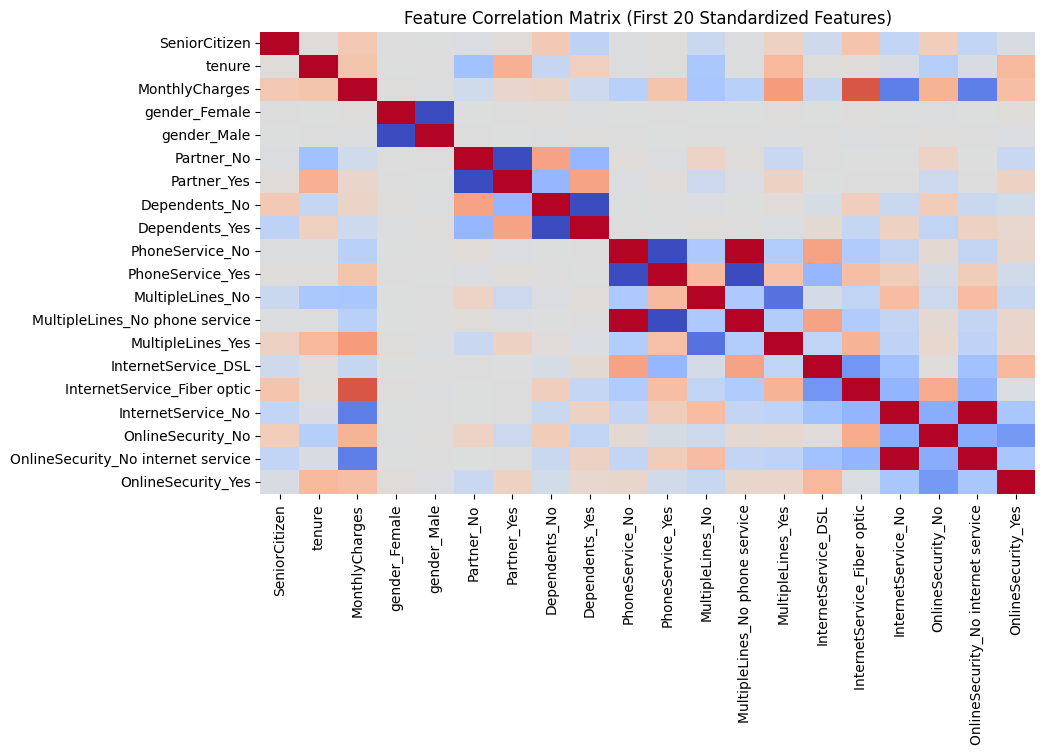

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns (drop target if present)
categorical_cols = [col for col in categorical_cols if col != 'customerID' and col != 'Churn']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
X_cat.columns = encoder.get_feature_names_out(categorical_cols)

# Combine numeric and encoded categorical features
X_full = pd.concat([X_num, X_cat], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Visualize the correlation matrix for a subset of features (e.g., first 20)
subset_cols = X_full.columns[:20]
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(X_scaled, columns=X_full.columns)[subset_cols].corr(), cmap='coolwarm', center=0, cbar=False)
plt.title('Feature Correlation Matrix (First 20 Standardized Features)')
plt.show()

---

## 5. PCA on Real-World Data

Let's apply PCA to the preprocessed telecom churn dataset. We'll examine the explained variance, principal component loadings, and visualize the results.

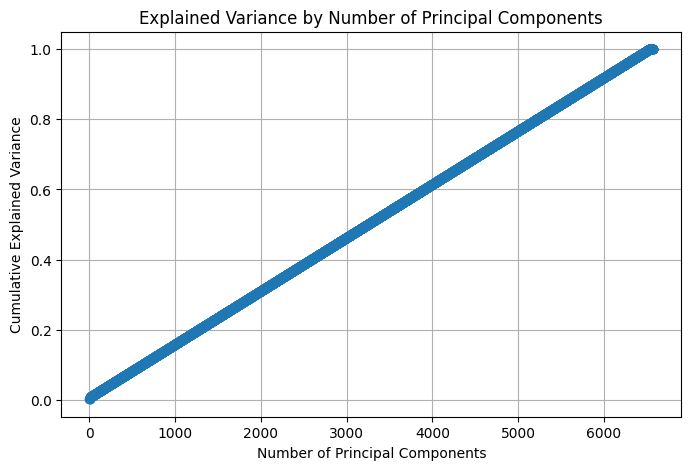

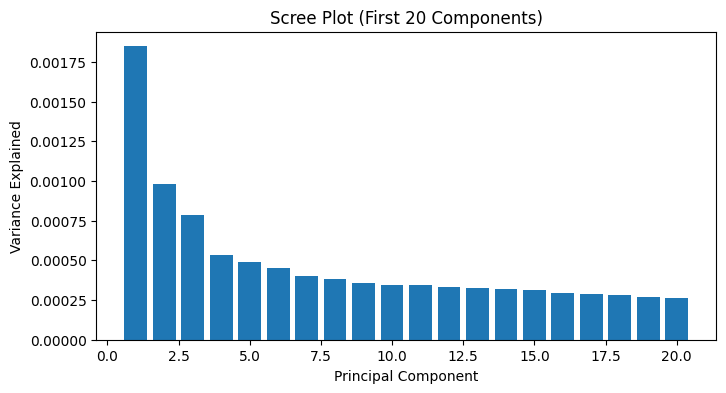

In [3]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Scree plot
plt.figure(figsize=(8,4))
plt.bar(range(1, 21), explained_var[:20])
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot (First 20 Components)')
plt.show()

### Interpretation

- The cumulative explained variance plot shows how much information is retained as we add more components.
- The scree plot helps identify the "elbow" point, suggesting a good cutoff for the number of components to retain.
- In practice, we often choose the smallest number of components that explain at least 90% of the variance.

---

## 6. Visualizing PCA Results

Let's visualize the data projected onto the first two principal components. This can reveal clusters or patterns not visible in the original high-dimensional space. We'll also color points by the churn outcome.

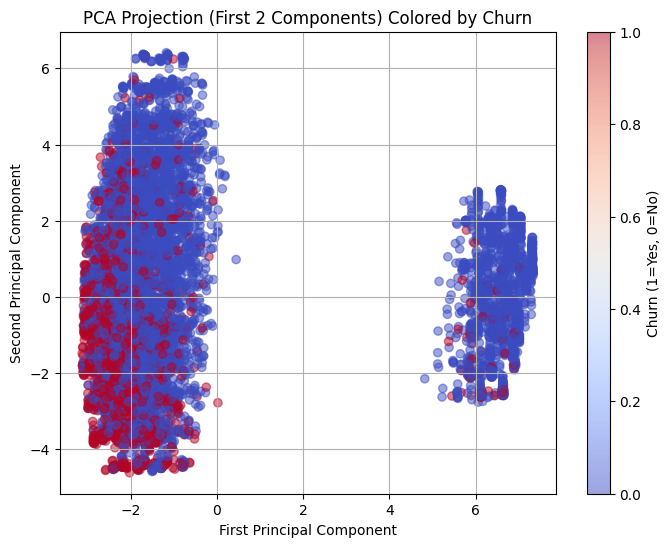

In [4]:
# Project data onto the first two principal components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Add churn labels for visualization
churn_labels = df['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=churn_labels, cmap='coolwarm', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection (First 2 Components) Colored by Churn')
plt.colorbar(label='Churn (1=Yes, 0=No)')
plt.grid(True)
plt.show()

### Interpreting Principal Components

- Each principal component is a linear combination of the original features.
- The first component captures the direction of maximum variance; the second is orthogonal and captures the next most variance.
- Coloring by churn outcome can reveal whether PCA captures any separation between classes.

---

## 7. Choosing the Number of Components

The number of principal components to retain is often chosen based on the cumulative explained variance. Common methods include:
- **Variance Threshold:** Retain enough components to explain a desired percentage (e.g., 90%) of the variance.
- **Scree Plot:** Look for the "elbow" point where additional components add little variance.
- **Kaiser Criterion:** Retain components with eigenvalues greater than 1 (for standardized data).
- **Parallel Analysis:** Compare eigenvalues to those from random data.

$$
\sum_{i=1}^k \lambda_i \geq \alpha \sum_{i=1}^p \lambda_i
$$

where $\lambda_i$ are the eigenvalues (explained variances) and $\alpha$ is the desired threshold (e.g., 0.90 for 90%).

**Tip:** Fewer components mean more compression but greater information loss.

---

## 8. Reconstruction and Information Loss

PCA can be used to reconstruct the original data using a limited number of components. The difference between the original and reconstructed data quantifies information loss.

Mean squared reconstruction error with 10 components: 0.9934


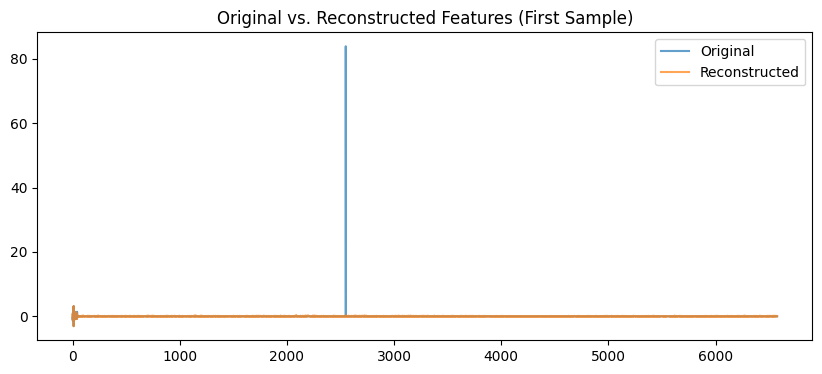

In [5]:
# Reconstruct the data using the first N components
N = 10
pca_n = PCA(n_components=N)
X_pca_n = pca_n.fit_transform(X_scaled)
X_reconstructed = pca_n.inverse_transform(X_pca_n)

# Compute reconstruction error (mean squared error)
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2)
print(f'Mean squared reconstruction error with {N} components: {reconstruction_error:.4f}')

# Visualize original vs reconstructed for a few samples
plt.figure(figsize=(10,4))
plt.plot(X_scaled[0,:], label='Original', alpha=0.7)
plt.plot(X_reconstructed[0,:], label='Reconstructed', alpha=0.7)
plt.title('Original vs. Reconstructed Features (First Sample)')
plt.legend()
plt.show()

---

## 9. PCA for Visualization: 2D and 3D Plots

PCA is often used to visualize high-dimensional data in 2D or 3D. Let's see a 3D example using the same dataset, colored by churn outcome.

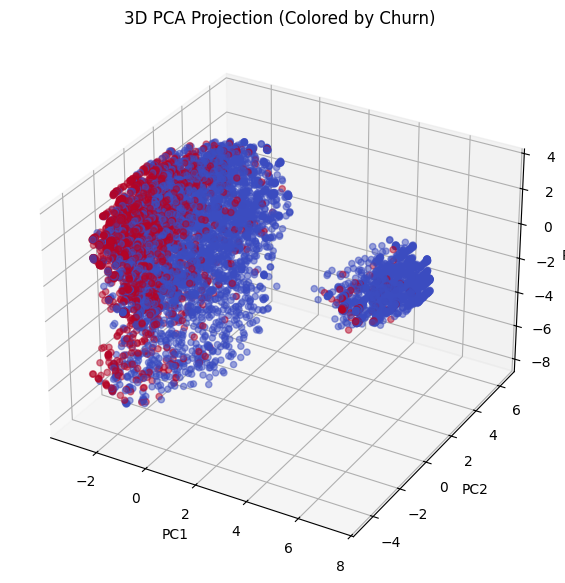

In [6]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=churn_labels, cmap='coolwarm', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection (Colored by Churn)')
plt.show()

---

## 10. Limitations, Pitfalls, and Best Practices

- **Linearity:** PCA only captures linear relationships. Nonlinear structures may not be well represented. For nonlinear data, consider kernel PCA or t-SNE.
- **Scaling:** Always standardize features before applying PCA, especially if they are on different scales.
- **Interpretability:** Principal components are linear combinations of original features and may not be easily interpretable. Use loading plots to understand feature contributions.
- **Missing Data:** PCA cannot handle missing values directly; impute or remove missing data first.
- **Outliers:** Outliers can distort principal components. Detect and handle them before PCA.
- **Categorical Data:** PCA is not suitable for categorical variables unless they are properly encoded.
- **Variance vs. Predictive Power:** High explained variance does not always mean better predictive performance.

---

### Summary
PCA is a fundamental tool for dimensionality reduction, visualization, and noise reduction. It is most effective when used thoughtfully, with attention to scaling, interpretability, and the nature of the data. Always validate the impact of PCA on downstream tasks.